In [1]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,4.2)
plt.rcParams["figure.titlesize"] = 11 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 11 # control title size
plt.rcParams["axes.labelsize"] = 11 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 11 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 11 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it

# Slow Modulation $\Omega$ << $\omega$

Note: When we saw "slow" modulation, we mean modulation being "slow" with respect to the cavity linewidth. For example, a modulation frequency of 1kHz sent into the EOM to generate sidebands would be much smaller than a cavity linewidth of 1MHz (e.g. from a cavity with finesse of about 1,000 and a spectral range is 1GHz, so cavity linewidth is 1GHz/1000 = 1MHz)

The error signal is given by

$\epsilon = P_o \beta \Omega \frac{d|F|^2}{d\omega} = 2 \sqrt{P_cP_s}\Omega \frac{d|F|^2}{d\omega} $

Here, $\frac{d|F|^2}{d\omega}$ is given by

$\frac{d|F|^2}{d\omega} = \frac{2r^2sin(\omega)(r^2-1)^2}{(1-2r^2cos(\omega)+r^4)^2}$

To note, 

* $F(\omega)$ is the reflection coefficient, given by $\frac{E_{reflection}}{E_{incident}}= \frac{r(e^{(i\frac{\omega}{\Delta v_{FSR}})})}{1-r^2e^{(i\frac{\omega}{\Delta v_{FSR}})}}$
* $r$ is the amplitude reflection coefficient of the mirror
* $P$ is the power of the reflected beam
* $\beta$ is the modulation depth
* $P_c$ and $P_s$ are the power of the carrier and sidebands respectively

To plot the error signal, we plot $\frac{d|F|^2}{d\omega}$ (=$\frac{\epsilon}{2\sqrt{P_cP_s}\Omega}$) against $f$ (=$\frac{\omega}{\Delta v_{FSR}}$). Since $\epsilon\propto\frac{d|F|^2}{d\omega}$ and $f\propto\omega$, we can just directly plot $\frac{d|F|^2}{d\omega}$ against $\omega$ based off the formula above.

In [2]:
# import numpy as np

# w = np.linspace(-0.5, 0.5, 1000)

# # plt.figure(figsize=(18,6))
# for i in np.arange(0.9, 1.0, 0.02):
#     r = np.round(i,2)
#     finesse = np.pi/(2*np.arccos(r))
#     dF2dw = (2*r**2*np.sin(w)*(r**2-1)**2)/(1-2*r**2*np.cos(w)+r**4)**2
#     plt.plot(w, dF2dw, label=f'F={np.round(finesse,2)}')
# # plt.ylim(-3,3)
# plt.legend(loc='upper right')

# plt.xlabel('Frequency (w)')
# plt.ylabel(r'Error Signal ($\frac{d|F|^2}{d\omega}$)')
# plt.title('Error Signal for Different Finesse \n in Slow Modulation Regime')

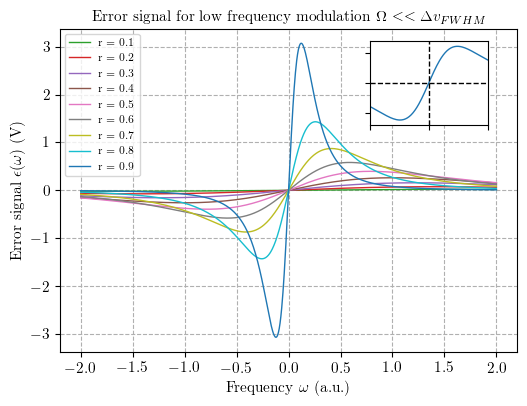

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def errorsignal_slowmodulation(frequency,r):
    return (2*r**2*np.sin(frequency)*(r**2-1)**2)/(1-2*r**2*np.cos(frequency)+r**4)**2

frequency = np.linspace(-2, 2, 1000)

for i in range(1,10):
    plt.plot(frequency,errorsignal_slowmodulation(frequency,r=i/10),label='r = '+str(i/10), color='C'+str(i+1))
# plt.axvline(x=0, color='black', linestyle='--')
# plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel(r'Frequency $\omega$ (a.u.)')
plt.ylabel(r'Error signal $\epsilon(\omega)$ (V)')
plt.legend()
plt.title(r'Error signal for low frequency modulation $\Omega << \Delta v_{FWHM}$')

### plot an inset that zooms in on the error signal for r=0.9 close to x=0 and y=0 i.e. resonance
axins = plt.axes([0.65, 0.65, 0.2, 0.2]) # inset axes
axins.plot(frequency,errorsignal_slowmodulation(frequency,r=0.9))
axins.axvline(x=0, color='black', linestyle='--')
axins.axhline(y=0, color='black', linestyle='--')
axins.set_xlim(-0.25,0.25)
axins.set_ylim(-3.5,3.5)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.grid(visible=False)
plt.draw()

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it

plt.savefig('250226 ErrorSignalSlowModulation.pdf', dpi=300)

# might wanna change the axis to units of gamma linewidth finesse blablabla you know the drill

# Fast Modulation $\Omega$ >> $\omega$

Formulaes that are relevant:

$\epsilon = -4\sqrt{P_c P_s}Im[F(\omega)]$

$Im[F(\omega)]=\frac{r\sin(\omega)(1-r^2)}{(1-r^2\cos(\omega))^2+(r^2\sin(\omega))^2}$

To plot the error signal, we plot $Im[F(\omega)]$ (=$\frac{\epsilon}{-4\sqrt{P_c P_s}}$) against $f$ (=$\frac{\omega}{\Delta v_{FSR}}$). Since $\epsilon\propto Im[F(\omega)]$ and $f\propto\omega$, we can just directly plot $Im[F(\omega)]$ against $\omega$ based off the formula above.

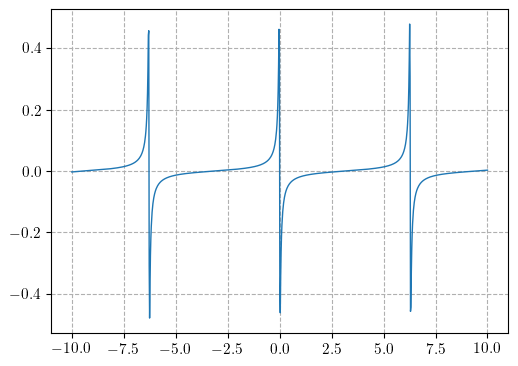

In [ ]:
def errorsignal_fastmodulation(frequency,r):
    return -(r*np.sin(frequency)*(1-r**2))/((1-r**2*np.cos(frequency))**2+(r**2*np.sin(frequency))**2)

frequency = np.linspace(-10, 10, 1000)

plt.plot(frequency,errorsignal_fastmodulation(frequency,r=0.99))

# Phase Difference Plots

Now we consider the above but for different phase differences between the modulation and demodulation 

See Ravin stuff